#Titanic Survival Prediction

[Titanic](https://en.wikipedia.org/wiki/Titanic) was a British passenger liner operated by the White Star Line that sank in the North Atlantic Ocean on 15 April 1912, after striking an iceberg during her maiden voyage from Southampton to New York City. Of the estimated 2,224 passengers and crew aboard, more than 1,500 died, making the sinking at the time the deadliest of a single ship in the West and the deadliest peacetime sinking of a superliner or cruise ship to date. With much public attention in the aftermath the disaster has since been the material of many artistic works and a founding material of the disaster film genre.

**Introduction:**  
In this notebook, I will try to analyse of the [Kaggle Titanic survival prediction competition](https://www.kaggle.com/c/titanic). I want to train ML model to predict survival outcome and make survival prediction on data that our model has not seen before.

This is a beginner's competition on [Kaggle](https://www.kaggle.com/) site for people who want to start journey with data science and machine learning.  

**What Data Will I Use in This Competition?**   
In this competition, you’ll gain access to two similar datasets that include passenger information like name, age, gender, socio-economic class, etc. One dataset is titled `train.csv` and the other is titled `test.csv`.

Train.csv will contain the details of a subset of the passengers on board (891 to be exact) and importantly, will reveal whether they survived or not, also known as the “ground truth”.

The `test.csv` dataset contains similar information but does not disclose the “ground truth” for each passenger. It’s your job to predict these outcomes.

Using the patterns you find in the train.csv data, predict whether the other 418 passengers on board (found in test.csv) survived.

**Data Overview**  
The data has been split into two groups:

training set (train.csv)
test set (test.csv)
The training set should be used to build your machine learning models. For the training set, we provide the outcome (also known as the “ground truth”) for each passenger. Your model will be based on “features” like passengers’ gender and class. You can also use feature engineering to create new features.

The test set should be used to see how well your model performs on unseen data. For the test set, we do not provide the ground truth for each passenger. It is your job to predict these outcomes. For each passenger in the test set, use the model you trained to predict whether or not they survived the sinking of the Titanic.

Data Dictionary
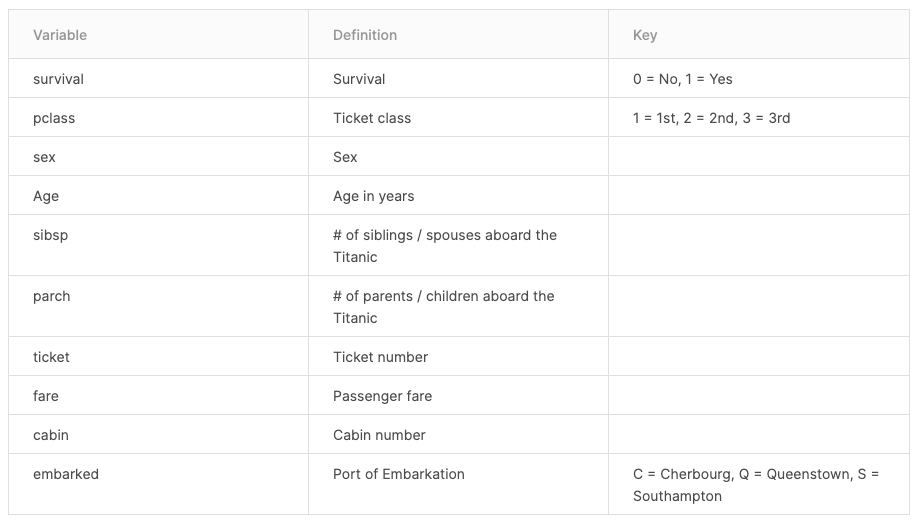

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

# Import libraries

In [113]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
# Data wrangling
import numpy as np
import pandas as pd
import missingno

# Data visualisation
import seaborn as sns
import matplotlib.pyplot as plt


# Machine learning models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

# Encoding
from sklearn.impute import SimpleImputer

# Metrix
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

# Import and read data

Import and read the 3 dataset.

In [2]:
train_dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/train.csv')
test_dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/test.csv')

Let's have a look at the first 10 rows.

In [3]:
train_dataset.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
test_dataset.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


Let's print shape and counts columns for training and test set. You can see that test set doesn't have Survived column. This is because Survived is our response variable. Our job is to find and predict who will survive.

In [5]:
print('Training set shape:', train_dataset.shape,)
print('Count Training set row:\n', train_dataset.count(), '\n')
print("Test set shape: ", test_dataset.shape,)
print('Count Test set row:\n', test_dataset.count(), '\n')

Training set shape: (891, 12)
Count Training set row:
 PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64 

Test set shape:  (418, 11)
Count Test set row:
 PassengerId    418
Pclass         418
Name           418
Sex            418
Age            332
SibSp          418
Parch          418
Ticket         418
Fare           417
Cabin           91
Embarked       418
dtype: int64 



Non-null count and data types of the training and test set.

In [6]:
train_dataset.info()
print('*'*40)
test_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
****************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passenger

Let's have a look if we have missing data in our training and test set.

In [7]:
train_dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
test_dataset.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

Another view for missing data for training and test set.

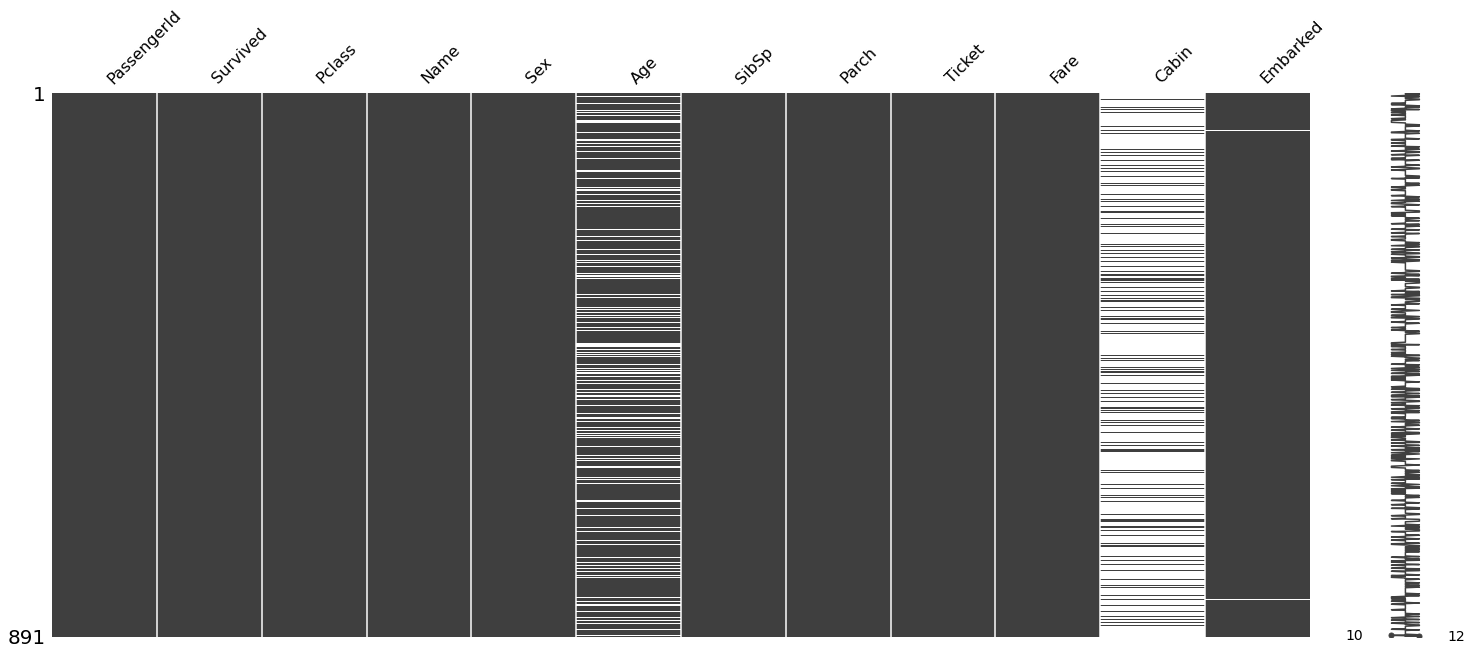

In [9]:
missingno.matrix(train_dataset)

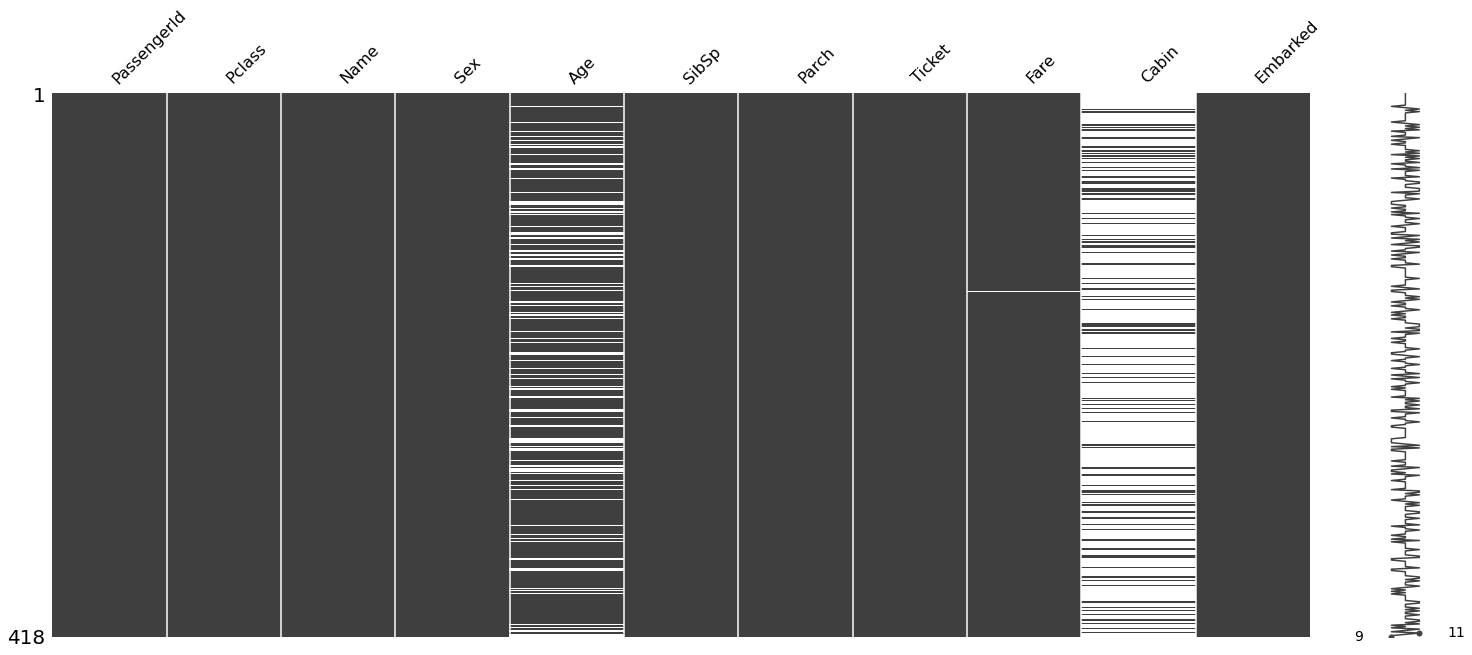

In [10]:
missingno.matrix(test_dataset)

Summary statistics for trainig and test set.

In [11]:
train_dataset.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [12]:
test_dataset.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


# Data Visualization - [Seaborn](https://seaborn.pydata.org/)

***Categorical variables.*** 

A categorical variable takes only a limited number of values.

Consider a survey that asks how often you eat breakfast and provides four options: "Never", "Rarely", "Most days", or "Every day". In this case, the data is categorical, because responses fall into a fixed set of categories.
If people responded to a survey about which what brand of car they owned, the responses would fall into categories like "Honda", "Toyota", and "Ford". In this case, the data is also categorical.
You will get an error if you try to plug these variables into most machine learning models in Python without preprocessing them first.
https://www.kaggle.com/alexisbcook/categorical-variables

Categorical variables in our dataset are Survived, Sex, Pclass and Embarked.

In [ ]:
sns.set_theme(style="darkgrid")

**Categorical variable: Survived**

In [ ]:
train_dataset['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

Text(0.5, 1.0, 'Survived')

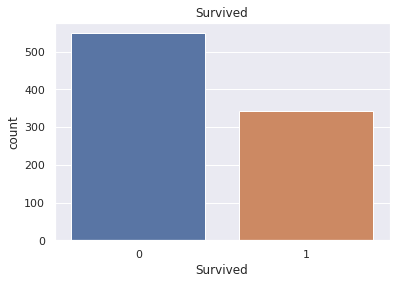

In [ ]:
sns.countplot(x='Survived', data=train_dataset)
plt.title('Survived')

Less people survive than died.

**Categorical variable: Sex**

Counts of the sex column.

In [ ]:
train_dataset['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

Mean of survival by sex.

In [ ]:
train_dataset[['Sex', 'Survived']].groupby('Sex', as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


Text(0.5, 1.0, 'Gender Survival')

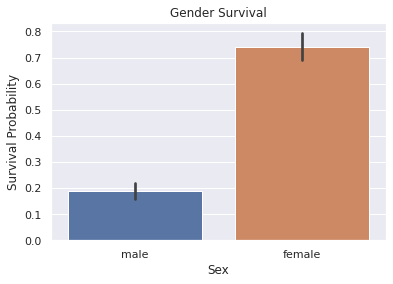

In [ ]:
sns.barplot(x = 'Sex', y ='Survived', data = train_dataset)
plt.ylabel('Survival Probability')
plt.title('Gender Survival')

Text(0.5, 1.0, 'Gender Survived')

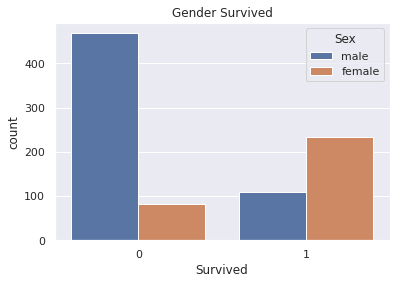

In [ ]:
sns.countplot(x = 'Survived', hue ='Sex', data = train_dataset)
plt.title('Gender Survived')

More female survive than male.

**Categorical variable: Pclass**

Value counts of the Pclass column.

In [ ]:
 train_dataset['Pclass'].value_counts(dropna = False)

3    491
1    216
2    184
Name: Pclass, dtype: int64

Mean of survival by passenger class.

In [ ]:
train_dataset[['Pclass', 'Survived']].groupby(['Pclass'], as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


Text(0.5, 1.0, 'Class wrt Survived')

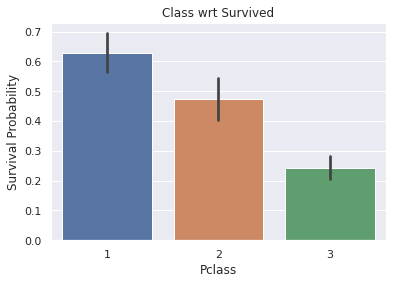

In [ ]:
sns.barplot(x = 'Pclass', y ='Survived', data = train_dataset)
plt.ylabel('Survival Probability')
plt.title('Class wrt Survived')

Passangers from the first class have bigger chance to survive than passanger from third class.

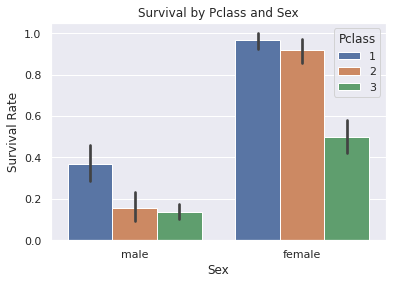

In [ ]:
sns.barplot(x='Sex', y='Survived', hue='Pclass', data=train_dataset)
plt.ylabel("Survival Rate")
plt.title("Survival by Pclass and Sex")
plt.show()

Females from the 1 and 2 class have bigger rate to survive than women from 3 class. The biggest chance to survive have only men from the first class.

**Categorical variable: Embarked**

Counts of the Embarked column.

In [ ]:
train_dataset['Embarked'].value_counts(dropna = False)

S      644
C      168
Q       77
NaN      2
Name: Embarked, dtype: int64

Text(0.5, 1.0, 'Survival Probability by Point of Embarkation')

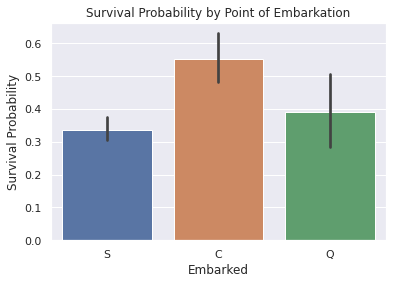

In [ ]:
sns.barplot(x = 'Embarked', y ='Survived', data = train_dataset)
plt.ylabel('Survival Probability')
plt.title('Survived wrs Embarkation')

Survival probability is bigger for passengers who embarked from location C and lowest from location S. We can create hypothesis whearby passengers, who embarked from location C, are the first class passegers. Location S has the lowest survival probability and it looks like this location was occupied by third class passengers.

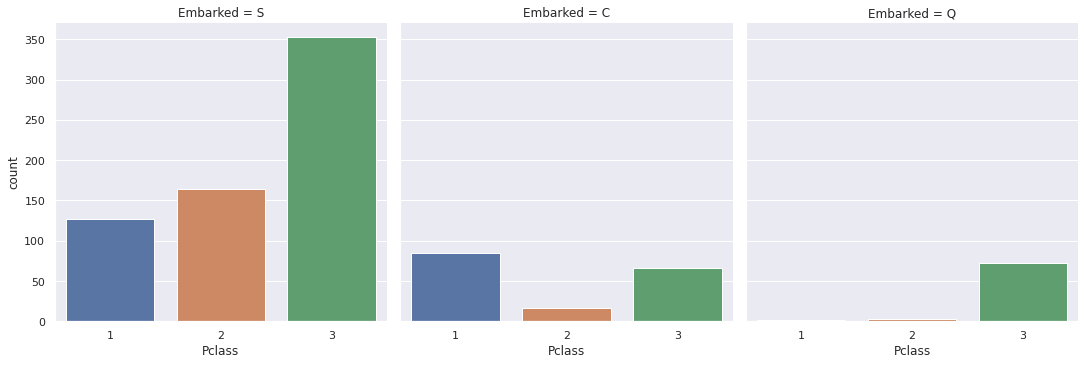

In [ ]:
sns.catplot(x = 'Pclass', col = 'Embarked', data = train_dataset, kind = 'count')

Our hypothesis looks to be true. Location S has more 3 class passengers and location C has 1 class passegers.

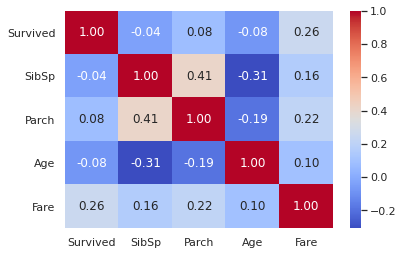

In [ ]:
sns.heatmap(train_dataset[['Survived', 'SibSp', 'Parch', 'Age', 'Fare']].corr(), annot = True, fmt = '.2f', cmap = 'coolwarm')


It looks like only "Fare" feature has a considerable correlation with survival.

***Numerical values***

**Numerical variable: SibSp**

Counts of the SibSp column 

In [ ]:
train_dataset['SibSp'].value_counts(dropna = False)

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

Mean of survival by SibSp

In [ ]:
train_dataset[['SibSp', 'Survived']].groupby('SibSp', as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


Text(0.5, 1.0, 'Survival Probability by SibSp')

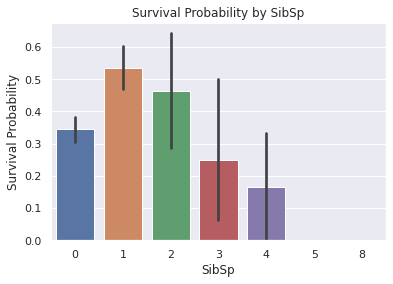

In [ ]:
sns.barplot(x = 'SibSp', y ='Survived', data = train_dataset)
plt.ylabel('Survival Probability')
plt.title('Survival Probability by SibSp')

The best chance to Survive have passengers who have 0 to 2 sibilings.

**Numerical variable: Parch**

Counts of the Parch column.

In [ ]:
train_dataset['Parch'].value_counts(dropna = False)

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

Mean of survival by Parch.

In [ ]:
train_dataset[['Parch', 'Survived']].groupby('Parch', as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


Text(0.5, 1.0, 'Survival Probability by Parch')

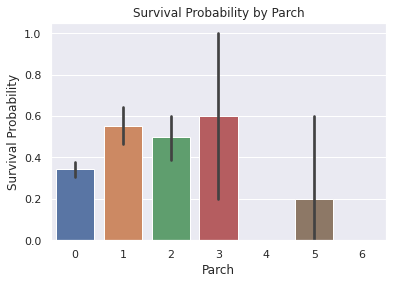

In [ ]:
sns.barplot(x = 'Parch', y ='Survived', data = train_dataset)
plt.ylabel('Survival Probability')
plt.title('Survival Probability by Parch')

**Numerical variable: Age**

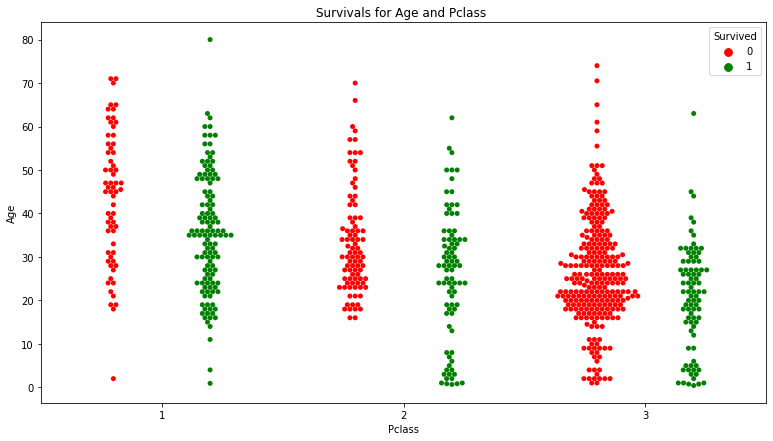

In [ ]:
fig, ax = plt.subplots(figsize=(13,7))
sns.swarmplot(x='Pclass', y='Age', hue='Survived', dodge=True, data=train_dataset , palette=["red" , "green"], ax=ax)
plt.title('Survivals for Age and Pclass ')
plt.show()

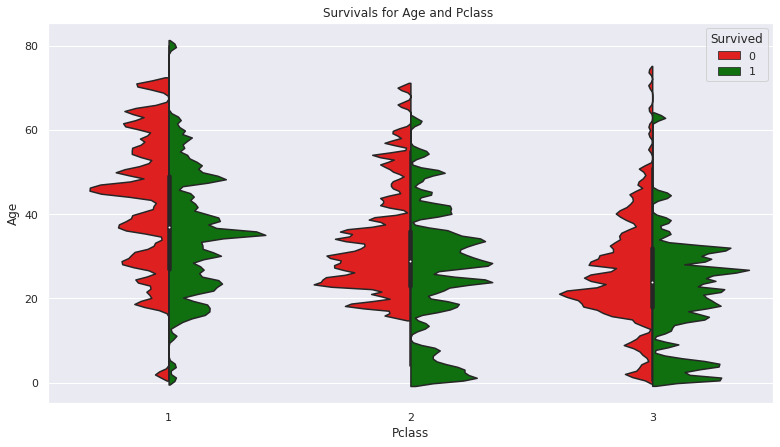

In [ ]:
fig, ax = plt.subplots(figsize=(13,7))
sns.violinplot(x="Pclass", y="Age", hue='Survived', data=train_dataset, split=True, bw=0.05 , palette=["red" , "green"], ax=ax)
plt.title('Survivals for Age and Pclass ')
plt.show()

The high survival rate for youngest passengers in Pclass 2.
Passengers older than 40 have more chance to survive in Pclass 1,
and smallest chance in Pclass 3.

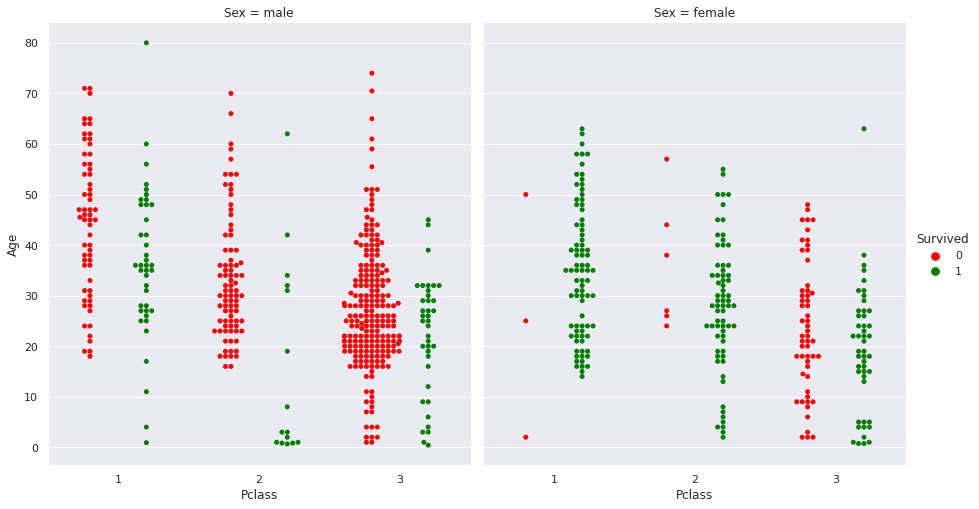

In [ ]:
g = sns.catplot(x="Pclass", y="Age", hue="Survived", col="Sex", data=train_dataset, kind="swarm", dodge=True, palette=["red" , "green"], height=7, aspect=.9)

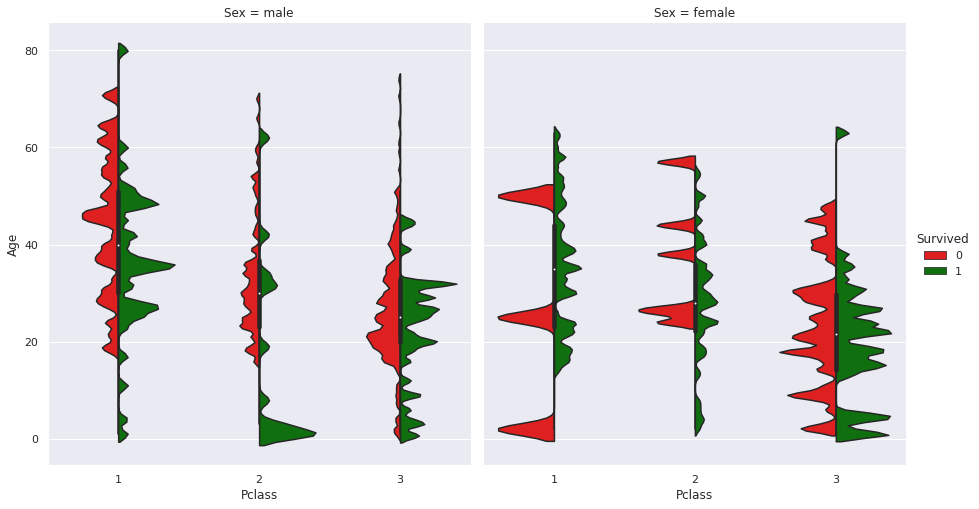

In [ ]:
g = sns.catplot(x="Pclass", y="Age", hue="Survived", col="Sex", data=train_dataset, kind="violin", split=True, bw=0.05, palette=["red" , "green"], height=7, aspect=.9)

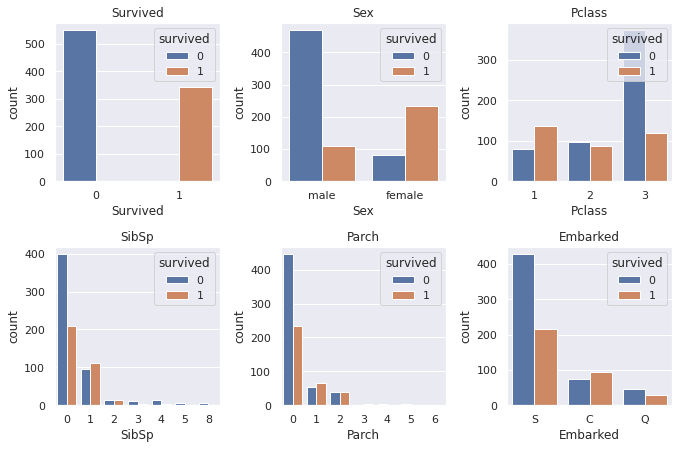

In [ ]:
cols = ['Survived', 'Sex', 'Pclass', 'SibSp', 'Parch', 'Embarked']

n_rows = 2
n_cols = 3

# The subplot grid and the figure size of each graph
# This returns a Figure (fig) and an Axes Object (axs)
fig, axs = plt.subplots(n_rows, n_cols, figsize=(n_cols*3.2,n_rows*3.2))

for r in range(0,n_rows):
    for c in range(0,n_cols):  
        
        i = r*n_cols+ c #index to go through the number of columns       
        ax = axs[r][c] #Show where to position each subplot
        sns.countplot(x=cols[i], hue="Survived", data=train_dataset, ax=ax)
        ax.set_title(cols[i])
        ax.legend(title="survived", loc='upper right') 
        
plt.tight_layout()

# Data Visualization - [Matplotlib](https://matplotlib.org/)

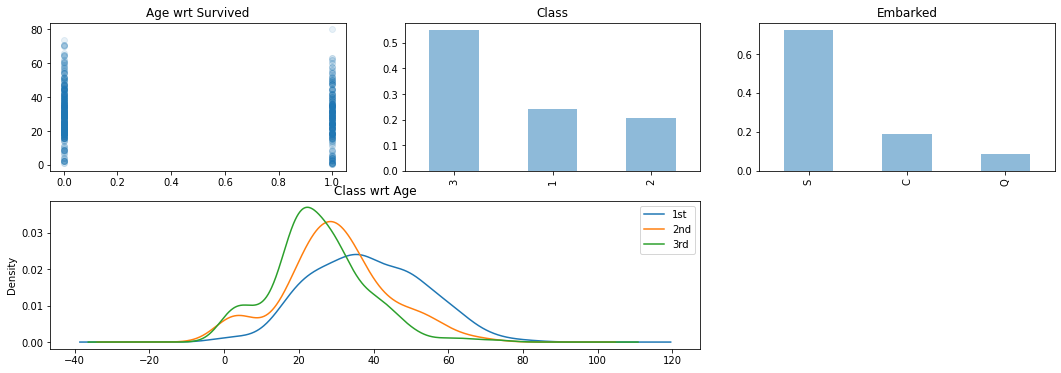

In [14]:
VCfig = plt.figure(figsize=(18,6))

plt.subplot2grid((2,3),(0,0))
plt.scatter(train_dataset.Survived, train_dataset.Age, alpha=0.1)
plt.title("Age wrt Survived")

plt.subplot2grid((2,3),(0,1))
train_dataset.Pclass.value_counts(normalize=True).plot(kind="bar", alpha=0.5)
plt.title("Class")

plt.subplot2grid((2,3),(0,2))
train_dataset.Embarked.value_counts(normalize=True).plot(kind="bar", alpha=0.5)
plt.title("Embarked")

plt.subplot2grid((2,3),(1,0), colspan=2)
for x in [1, 2, 3]:
    train_dataset.Age[train_dataset.Pclass == x].plot(kind="kde")
plt.title("Class wrt Age")
plt.legend(("1st", "2nd", "3rd"))


plt.show()

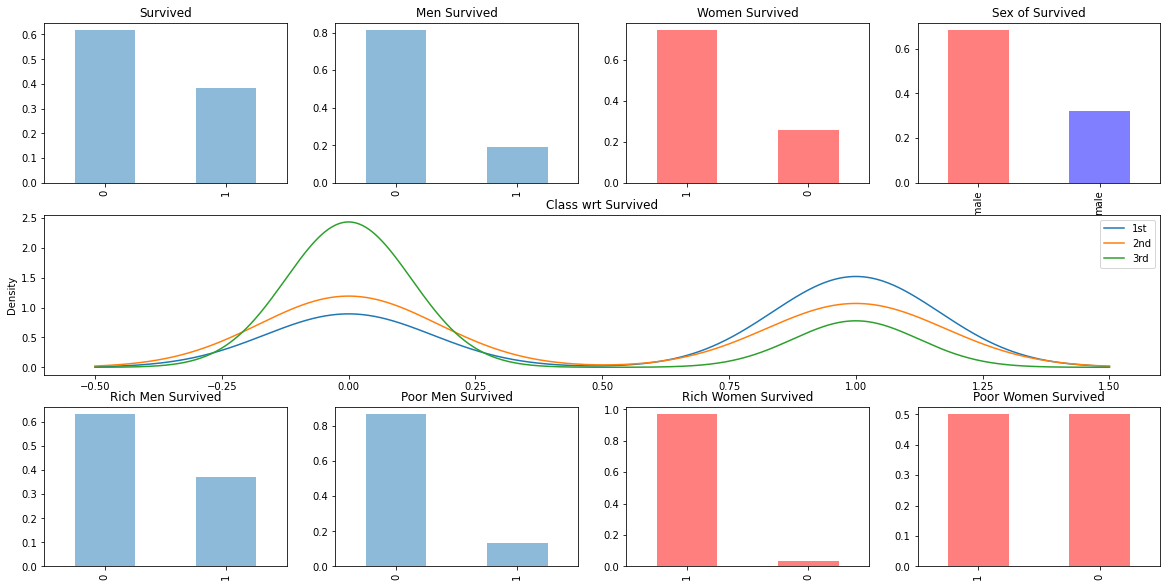

In [15]:
fig = plt.figure(figsize=(20,10))
female_color = "red"

plt.subplot2grid((3,4),(0,0))
train_dataset.Survived.value_counts(normalize=True).plot(kind="bar", alpha=0.5)
plt.title("Survived")


plt.subplot2grid((3,4),(0,1))
train_dataset.Survived[train_dataset.Sex == "male"].value_counts(normalize=True).plot(kind="bar", alpha=0.5)
plt.title("Men Survived")

plt.subplot2grid((3,4),(0,2))
train_dataset.Survived[train_dataset.Sex == "female"].value_counts(normalize=True).plot(kind="bar", alpha=0.5, color=female_color)
plt.title("Women Survived")

plt.subplot2grid((3,4),(0,3))
train_dataset.Sex[train_dataset.Survived == 1].value_counts(normalize=True).plot(kind="bar", alpha=0.5, color=[female_color, "b"])
plt.title("Sex of Survived")

plt.subplot2grid((3,4),(1,0), colspan=4)
for x in [1, 2, 3]:
    train_dataset.Survived[train_dataset.Pclass == x].plot(kind="kde")
plt.title("Class wrt Survived")
plt.legend(("1st", "2nd", "3rd"))

plt.subplot2grid((3,4),(2,0))
train_dataset.Survived[(train_dataset.Sex == "male") &  (train_dataset.Pclass == 1)].value_counts(normalize=True).plot(kind="bar", alpha=0.5)
plt.title("Rich Men Survived")

plt.subplot2grid((3,4),(2,1))
train_dataset.Survived[(train_dataset.Sex == "male") &  (train_dataset.Pclass == 3)].value_counts(normalize=True).plot(kind="bar", alpha=0.5)
plt.title("Poor Men Survived")

plt.subplot2grid((3,4),(2,2))
train_dataset.Survived[(train_dataset.Sex == "female") &  (train_dataset.Pclass == 1)].value_counts(normalize=True).plot(kind="bar", alpha=0.5, color=female_color)
plt.title("Rich Women Survived")

plt.subplot2grid((3,4),(2,3))
train_dataset.Survived[(train_dataset.Sex == "female") &  (train_dataset.Pclass == 3)].value_counts(normalize=True).plot(kind="bar", alpha=0.5, color=female_color)
plt.title("Poor Women Survived")

plt.show()

# Hypotypose

In [16]:
train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/train.csv')

train["Hyp"] = 0;
train.loc[train.Sex == "female", "Hyp"] = 1
train["Result"] = 0
train.loc[train.Survived == train["Hyp"], "Result"] = 1 
print (train["Result"].value_counts(normalize = True))


1    0.786756
0    0.213244
Name: Result, dtype: float64


# Checking Missing Data


In [14]:
train_dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [15]:
test_dataset.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

# Drop columns

Train Dataset

In [13]:
train_dataset['Title'] = train_dataset['Name'].map(lambda name:name.split(',')[1].split('.')[0].strip())


In [14]:
title = pd.crosstab(train_dataset['Title'], train_dataset['Sex'])
title

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40
Miss,182,0


In [15]:
train_dataset['Title'] = train_dataset['Title'].replace(['Dr', 'Rev', 'Col', 'Major', 'Lady', 'Jonkheer', 'Don', 'Capt', 'the Countess',
                                             'Sir', 'Dona'], 'Rare')
train_dataset['Title'] = train_dataset['Title'].replace(['Mlle', 'Ms'], 'Miss')
train_dataset['Title'] = train_dataset['Title'].replace('Mme', 'Mrs')

In [16]:
train_dataset['Title'].value_counts()

Mr        517
Miss      185
Mrs       126
Master     40
Rare       23
Name: Title, dtype: int64

In [17]:
train_dataset[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


In [18]:
train_dataset = train_dataset.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

In [19]:
print(train_dataset.head(10))
train_dataset.isnull().sum()

   Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked   Title
0         0       3    male  22.0      1      0   7.2500        S      Mr
1         1       1  female  38.0      1      0  71.2833        C     Mrs
2         1       3  female  26.0      0      0   7.9250        S    Miss
3         1       1  female  35.0      1      0  53.1000        S     Mrs
4         0       3    male  35.0      0      0   8.0500        S      Mr
5         0       3    male   NaN      0      0   8.4583        Q      Mr
6         0       1    male  54.0      0      0  51.8625        S      Mr
7         0       3    male   2.0      3      1  21.0750        S  Master
8         1       3  female  27.0      0      2  11.1333        S     Mrs
9         1       2  female  14.0      1      0  30.0708        C     Mrs


Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
Title         0
dtype: int64

Test Dataset

In [20]:
test_dataset['Title'] = test_dataset['Name'].map(lambda name:name.split(',')[1].split('.')[0].strip())

In [21]:
title=pd.crosstab(test_dataset['Title'], test_dataset['Sex'])
title

Sex,female,male
Title,,
Col,0,2
Dona,1,0
Dr,0,1
Master,0,21
Miss,78,0
Mr,0,240
Mrs,72,0
Ms,1,0
Rev,0,2


In [22]:
test_dataset['Title'] = test_dataset['Title'].replace(['Dr', 'Rev', 'Col', 'Major', 'Lady', 'Jonkheer', 'Don', 'Capt', 'the Countess',
                                             'Sir', 'Dona'], 'Rare')
test_dataset['Title'] = test_dataset['Title'].replace(['Mlle', 'Ms'], 'Miss')
test_dataset['Title'] = test_dataset['Title'].replace('Mme', 'Mrs')

In [23]:
test_dataset['Title'].value_counts()

Mr        240
Miss       79
Mrs        72
Master     21
Rare        6
Name: Title, dtype: int64

In [24]:
PassengerId_test_dt = test_dataset.PassengerId
print(PassengerId_test_dt)

0       892
1       893
2       894
3       895
4       896
       ... 
413    1305
414    1306
415    1307
416    1308
417    1309
Name: PassengerId, Length: 418, dtype: int64


In [25]:
test_dataset = test_dataset.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

In [26]:
print(test_dataset.head(10))

   Pclass     Sex   Age  SibSp  Parch     Fare Embarked Title
0       3    male  34.5      0      0   7.8292        Q    Mr
1       3  female  47.0      1      0   7.0000        S   Mrs
2       2    male  62.0      0      0   9.6875        Q    Mr
3       3    male  27.0      0      0   8.6625        S    Mr
4       3  female  22.0      1      1  12.2875        S   Mrs
5       3    male  14.0      0      0   9.2250        S    Mr
6       3  female  30.0      0      0   7.6292        Q  Miss
7       2    male  26.0      1      1  29.0000        S    Mr
8       3  female  18.0      0      0   7.2292        C   Mrs
9       3    male  21.0      2      0  24.1500        S    Mr


# Split matrix to X an y

In [27]:
# X -> independent_feature
# y -> dependent_feature
X = train_dataset.iloc[:, 1:].values
y = train_dataset.iloc[:, 0].values
X_test = test_dataset.iloc[:, :].values

In [28]:
print('Element from "X" matrix: \n', X, '\n')
print('All "y_train" matrix: \n', y)

Element from "X" matrix: 
 [[3 'male' 22.0 ... 7.25 'S' 'Mr']
 [1 'female' 38.0 ... 71.2833 'C' 'Mrs']
 [3 'female' 26.0 ... 7.925 'S' 'Miss']
 ...
 [3 'female' nan ... 23.45 'S' 'Miss']
 [1 'male' 26.0 ... 30.0 'C' 'Mr']
 [3 'male' 32.0 ... 7.75 'Q' 'Mr']] 

All "y_train" matrix: 
 [0 1 1 1 0 0 0 0 1 1 1 1 0 0 0 1 0 1 0 1 0 1 1 1 0 1 0 0 1 0 0 1 1 0 0 0 1
 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 1 1 0 1 1 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0
 1 0 0 0 1 1 0 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 1 0
 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1
 0 1 1 0 0 1 0 1 1 1 1 0 0 1 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 1 1 0 1 0 1 0
 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 1
 1 0 1 0 0 0 0 0 1 1 1 0 1 1 0 1 1 0 0 0 1 0 0 0 1 0 0 1 0 1 1 1 1 0 0 0 0
 0 0 1 1 1 1 0 1 0 1 1 1 0 1 1 1 0 0 0 1 1 0 1 1 0 0 1 1 0 1 0 1 1 1 1 0 0
 0 1 0 0 1 1 0 1 1 0 0 0 1 1 1 1 0 0 0 0 

# Taking care of missing data

Train data

In [29]:
print('Empty "Embarked" row from X_train matrix:', X[829])

Empty "Embarked" row from X_train matrix: [1 'female' 62.0 0 0 80.0 nan 'Mrs']


In [30]:
# Embarked
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputer.fit(X[:, 6:7])
X[:, 6:7] = imputer.transform(X[:, 6:7])

In [31]:
print('"Embarked" row after transform:', X[829])

"Embarked" row after transform: [1 'female' 62.0 0 0 80.0 'S' 'Mrs']


In [32]:
print('Empty "Age" row from X matrix:', X[17])

Empty "Age" row from X matrix: [2 'male' nan 0 0 13.0 'S' 'Mr']


In [33]:
# Age 
# train_dataset["Age"] = train_dataset["Age"].fillna(train_dataset["Age"].dropna().median())
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
imputer.fit(X[:, 2:3])
X[:, 2:3] = imputer.transform(X[:, 2:3])

In [34]:
print('"Age" row after transform:', X[17])

"Age" row after transform: [2 'male' 28.0 0 0 13.0 'S' 'Mr']


[Label Encoder vs. One Hot Encoder in Machine Learning](https://contactsunny.medium.com/label-encoder-vs-one-hot-encoder-in-machine-learning-3fc273365621)

In [35]:
# Encode sex column (Label Encoder)
# from sklearn.preprocessing import LabelEncoder
# labelencoder = LabelEncoder()
# X_independent_feature[:,1]= labelencoder.fit_transform(X_independent_feature[:,1])
# print(X_independent_feature[1])

In [36]:
print('Encode "Sex" and "Embarked" rows from X matrix:' ,X[0])

Encode "Sex" and "Embarked" rows from X matrix: [3 'male' 22.0 1 0 7.25 'S' 'Mr']


In [37]:
# Encode 'Sex' and 'Embarked' colums (One hot encoder)
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1, 6, 7])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [38]:
print('"Sex" and "Embarked" row after transform for male and embarked:', X[0])

"Sex" and "Embarked" row after transform for male and embarked: [0.0 1.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 3 22.0 1 0 7.25]


***Test data***

Age

In [39]:
print('Empty "Age" row from X_test matrix:', X_test[22])

Empty "Age" row from X_test matrix: [1 'female' nan 0 0 31.6833 'S' 'Mrs']


In [40]:
#Age Imputer
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
imputer.fit(X_test[:, 2:3])
X_test[:, 2:3] = imputer.transform(X_test[:, 2:3])

In [41]:
print('"Age" row after transform:', X_test[22])

"Age" row after transform: [1 'female' 27.0 0 0 31.6833 'S' 'Mrs']


Fare

In [42]:
# print('Empty "Fare" row from X_test matrix:', X_test[152])

In [43]:
#Fare
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
imputer.fit(X_test[:, 5:6])
X_test[:, 5:6] = imputer.transform(X_test[:, 5:6])

In [44]:
print(X_test[152])

[3 'male' 60.5 0 0 14.4542 'S' 'Mr']


In [45]:
# Encode 'Sex' and 'Embarked colums (One hot encoder)
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1, 6, 7])], remainder='passthrough')
X_test = np.array(ct.fit_transform(X_test))

In [46]:
print('"Sex" and "Embarked" row after transform for male and embarked:', X_test[0])

"Sex" and "Embarked" row after transform for male and embarked: [0.0 1.0 0.0 1.0 0.0 0.0 0.0 1.0 0.0 0.0 3 34.5 0 0 7.8292]


# Splitting the dataset into the Training set and Test set

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=1/3, random_state=0)
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)

(594, 15)
(594,)
(297, 15)
(297,)


# Feature Scaling

Feature Scaling is one of the important pre-processing that is required for standardizing/normalization of the input data. When the range of values are very distinct in each column, we need to scale them to the common level. The values are brought to common level and then we can apply further machine learning algorithm to the input data.

***What is Standardization in Machine Learning ?***    
Standardization is based out of Standard Deviation. It measures the spread of value in the features. This is one of the most commonly used.

During standard scaling, we shift the mean of the features to value 0 and have standard deviation as 1. When the standard scaler is applied, we get values in the range of -3 to 3

***What is Normalization ?***   
Normalization is the concept of scaling the range of values in a feature between 0 to 1. This is referred as Min-Max Scaling.

[What, When and Why Feature Scaling for Machine Learning](https://medium.com/technofunnel/what-when-why-feature-scaling-for-machine-learning-standard-minmax-scaler-49e64c510422)

[Data Transformation: Standardization vs Normalization](https://www.kdnuggets.com/2020/04/data-transformation-standardization-normalization.html)



In [48]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[:, 10:] = sc.fit_transform(X_train[:, 10:])
X_val[:, 10:] = sc.fit_transform(X_val[:, 10:])
X_test[:, 10:] = sc.transform(X_test[:, 10:])

In [49]:
print('Train Feature Scaling:', X_train[0])
print('Val Feature Scaling:', X_val[0])
print('Test Feature Scaling', X_test[0])

Train Feature Scaling: [0.0 1.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 -1.5332393583047093
 2.4342893306931455 -0.4561599344236058 -0.4704735346837683
 0.019676270222015294]
Val Feature Scaling: [0.0 1.0 1.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.7934576918349316
 -0.0894960910969321 -0.5255883312276344 -0.484896648861152
 -0.3269461394816918]
Test Feature Scaling [0.0 1.0 0.0 1.0 0.0 0.0 0.0 1.0 0.0 0.0 0.7934576918349316
 0.406021744858634 -0.5255883312276344 -0.484896648861152
 -0.4540087138404848]


# Models

To describe Perfomance we will use confusion matrix.   
A [confusion matrix](https://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/) is a table that is often used to describe the performance of a classification model (or "classifier") on a set of test data for which the true values are known. The confusion matrix itself is relatively simple to understand, but the related terminology can be confusing.    

- true positives (TP): These are cases in which we predicted yes (they have the disease), and they do have the disease.    
- true negatives (TN): We predicted no, and they don't have the disease.     
- false positives (FP): We predicted yes, but they don't actually have the disease. (Also known as a "Type I error.")    
- false negatives (FN): We predicted no, but they actually do have the disease. (Also known as a "Type II error.")     
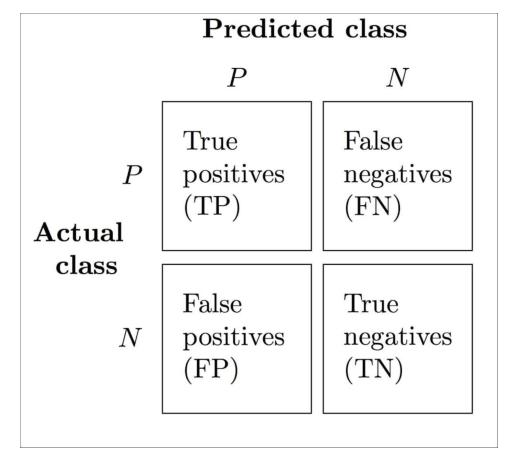 


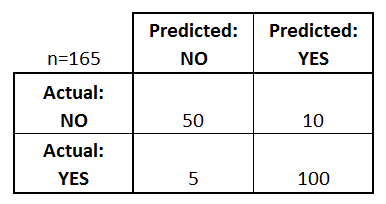

[k-Fold Cross-Validation](https://machinelearningmastery.com/k-fold-cross-validation/)

The general procedure is as follows:
- Shuffle the dataset randomly.
- Split the dataset into k groups
- For each unique group:
- Take the group as a hold out or test data set
- Take the remaining groups as a training data set
- Fit a model on the training set and evaluate it on the test set
- Retain the evaluation score and discard the model
- Summarize the skill of the model using the sample of model evaluation scores

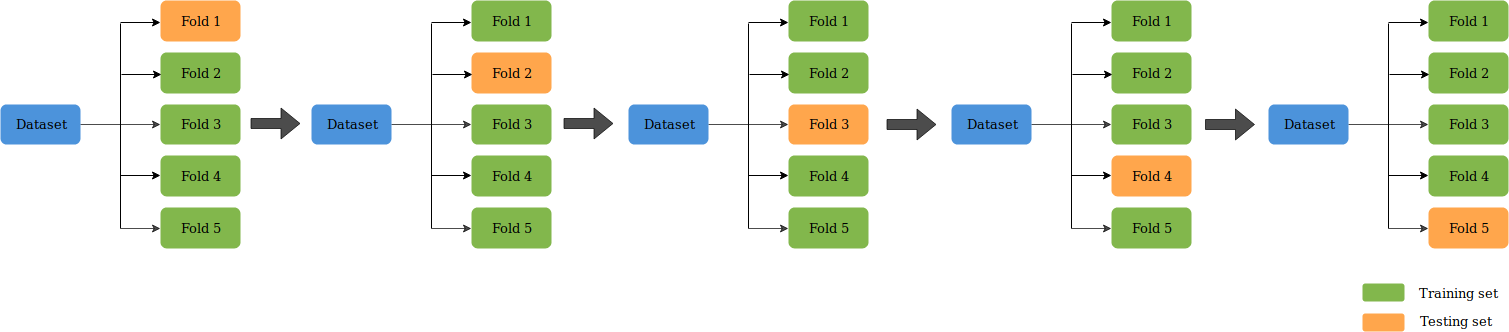


## Logistic Regression

[Logistic Regression](https://web.stanford.edu/~jurafsky/slp3/5.pdf)The goal of binary logistic regression is to train a classifier that can make a binary
decision about the class of a new input observation. 

Logistic Regression was used in the biological sciences in early twentieth century. It was then used in many social science applications. Logistic Regression is used when the dependent variable(target) is categorical.
For example:   
To predict whether an email is spam (1) or (0)   
Whether the tumor is malignant (1) or not (0)

[Logistic Regression-youtube](https://www.youtube.com/watch?v=yIYKR4sgzI8)

In [50]:
# Training the Simple Linear Regression model on the Training set
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(C = 10, penalty = 'l2', random_state=0)
log_reg.fit(X_train, y_train)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [51]:
log_reg_score = round(log_reg.score(X_train, y_train)* 100, 2)
print(log_reg_score)

83.33


In [52]:
y_pred = log_reg.predict(X_val)
print(y_pred)

[0 0 0 1 1 0 1 1 0 1 0 1 0 1 1 1 0 0 0 1 0 1 0 0 1 1 0 1 1 0 0 1 0 0 0 1 0
 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 1 1 1 0 1 0 1 1 1 0 0 0
 0 1 0 1 0 0 0 1 1 0 0 1 1 1 1 1 0 0 1 1 0 0 1 0 0 1 0 0 0 0 1 1 1 0 0 1 0
 1 0 1 0 1 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 1 1 1 0 1
 1 0 0 1 1 0 1 0 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0
 0 1 0 0 1 1 0 1 1 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 1 0 1 0 0 0 1 0 1 0 1
 1 0 0 0 0 1 0 0 0 1 1 1 0 0 1 1 1 0 0 1 0 0 1 1 1 0 0 1 0 0 0 0 0 1 1 0 0
 0 0 0 0 0 0 0 1 1 0 1 0 0 1 1 1 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 1 1 1 0
 0]


In [53]:
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_val.reshape(len(y_val),1)),1))

[[0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [1 0]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]

In [54]:
# Making the Confusion Matrix
log_reg_cm = confusion_matrix(y_val, y_pred)
print(log_reg_cm)
val_log_reg_acc_score = round(accuracy_score(y_val, y_pred, normalize=True) *100, 2)
val_log_reg_acc_score

[[157  29]
 [ 24  87]]


82.15

In [55]:
# Applying k-Fold Cross Validation
log_reg_accuracies = cross_val_score(estimator = log_reg, X = X_train, y = y_train, cv = 10)
cv_log_reg_acc_score = round(log_reg_accuracies.mean()*100, 2)
cv_log_reg_std = round(log_reg_accuracies.std()*100, 2)
print('Accuracy: {} %'.format(cv_log_reg_acc_score))
print("Standard Deviation: {} %".format(cv_log_reg_std))

Accuracy: 82.84 %
Standard Deviation: 3.83 %


In [56]:
# # Applying GridSearchCV Cross Validation
# parameters = {'penalty': ['l1','l2'], 'C': [0.001,0.01,0.1,1,10,100,1000]}
# grid_search = GridSearchCV(estimator = log_reg,
#                            param_grid = parameters,
#                            scoring = 'accuracy',
#                            cv = 10,
#                            n_jobs = -1)
# grid_search.fit(X_train, y_train)
# best_accuracy = grid_search.best_score_
# best_parameters = grid_search.best_params_
# print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
# print("Best Parameters:", best_parameters)

## Decision Tree Classifier

A [Decision Tree](https://www.datacamp.com/community/tutorials/decision-tree-classification-python) is a simple representation for classifying examples. It is a Supervised Machine Learning where the data is continuously split according to a certain parameter.    
Decision Tree consists of :    
- Nodes : Test for the value of a certain attribute.    
- Edges/ Branch : Correspond to the outcome of a test and connect to the next node or leaf.
- Leaf nodes : Terminal nodes that predict the outcome (represent class labels or class distribution).

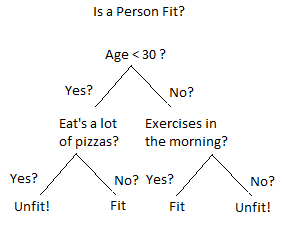

In [57]:
decision_tree = DecisionTreeClassifier(criterion = 'gini', random_state = 6, max_leaf_nodes = 24, max_depth = 9, min_samples_split = 8, min_samples_leaf = 1)
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=9, max_features=None, max_leaf_nodes=24,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=6, splitter='best')

In [58]:
decision_tree_score = round(decision_tree.score(X_train, y_train) *100, 2)
print(decision_tree_score)

88.05


In [59]:
y_pred = decision_tree.predict(X_val)
print(y_pred)

[0 0 0 1 0 0 1 1 0 1 0 1 0 1 1 1 0 0 0 1 0 1 0 0 1 1 0 1 1 0 0 1 0 0 0 1 0
 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 1 0 0 1 1 1 1 1 0 0
 0 0 0 1 0 0 0 1 1 0 0 1 1 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 1 0
 1 0 1 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 1 1 0 1
 1 0 0 0 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0
 0 1 0 0 1 1 1 1 1 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 1 0 1 0 0 0 1 0 1 0 1
 1 0 0 0 0 1 0 0 0 1 1 1 0 0 1 1 1 0 0 1 0 0 1 1 1 0 0 1 0 0 1 0 0 1 1 0 0
 0 0 0 0 0 0 0 1 0 0 1 0 0 1 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1 1 0
 0]


In [60]:
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_val.reshape(len(y_val),1)),1))

[[0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 1]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 0]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [0 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [1 0]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]

In [61]:
# Making the Confusion Matrix
decision_tree_cm = confusion_matrix(y_val, y_pred)
print(decision_tree_cm)
val_decision_tree_acc_score = round(accuracy_score(y_val, y_pred, normalize=True) * 100, 2)
val_decision_tree_acc_score

[[161  25]
 [ 32  79]]


80.81

In [62]:
# Applying k-Fold Cross Validation
decision_tree_accuracies = cross_val_score(estimator = decision_tree, X = X_train, y = y_train, cv = 10)
cv_decision_tree_acc_score = round(decision_tree_accuracies.mean()*100, 2)
cv_decision_tree_std  = round(decision_tree_accuracies.std()*100, 2)
print("Accuracy: {} %".format(cv_decision_tree_acc_score))
print("Standard Deviation: {:.2f} %".format(cv_decision_tree_std))

Accuracy: 81.65 %
Standard Deviation: 6.23 %


In [63]:
# # Applying GridSearchCV
# parameters = {'criterion': ['gini','entropy'], 
#               'max_leaf_nodes': list(range(2, 100)),
#               'max_depth': range(1, 10) ,
#               'min_samples_split' :range(1, 10),
#               'min_samples_leaf': range(1, 5),
#               'random_state': range(1, 10)}

# grid_search = GridSearchCV(estimator = decision_tree,
#                            param_grid = parameters,
#                            scoring = 'accuracy',
#                            cv = 10,
#                            n_jobs = -1)
# grid_search.fit(X_train, y_train)
# best_accuracy = grid_search.best_score_
# best_parameters = grid_search.best_params_
# print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
# print("Best Parameters:", best_parameters)

## Random Forest Classifier

[Random forests](https://www.datacamp.com/community/tutorials/random-forests-classifier-python) is a supervised learning algorithm. It can be used both for classification and regression. It is also the most flexible and easy to use algorithm. A forest is comprised of trees. It is said that the more trees it has, the more robust a forest is. Random forests creates decision trees on randomly selected data samples, gets prediction from each tree and selects the best solution by means of voting. It also provides a pretty good indicator of the feature importance.    

How does the algorithm work?    
It works in four steps:     
- Select random samples from a given dataset.
- Construct a decision tree for each sample and get a prediction result from each decision tree.
- Perform a vote for each predicted result.
- Select the prediction result with the most votes as the final prediction.

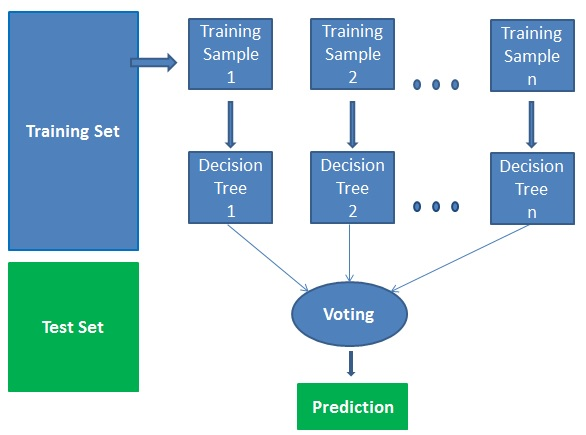

In [64]:
forest = RandomForestClassifier(bootstrap = True, criterion = 'entropy', max_depth = 80, max_features = 3, min_samples_leaf = 3, min_samples_split = 8, n_estimators = 1000)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=80, max_features=3,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [65]:
forest_score = round(forest.score(X_train, y_train) * 100, 2)
print(forest_score)

87.37


In [66]:
y_pred = forest.predict(X_val)

In [67]:
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_val.reshape(len(y_val),1)),1))

[[0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]

In [68]:
# Making the Confusion Matrix
forest_cm = confusion_matrix(y_val, y_pred)
print(forest_cm)
val_forest_acc_score = round(accuracy_score(y_val, y_pred, normalize=True) * 100, 2)
val_forest_acc_score

[[165  21]
 [ 29  82]]


83.16

In [69]:
# Applying k-Fold Cross Validation
forest_accuracies = cross_val_score(estimator = forest, X = X_train, y = y_train, cv = 10)
cv_forest_acc_score = round(forest_accuracies.mean()*100, 2)
cv_forest_std  = round(forest_accuracies.std()*100, 2)
print("Accuracy: {} %".format(cv_forest_acc_score))
print("Standard Deviation: {} %".format(cv_forest_std))

Accuracy: 83.18 %
Standard Deviation: 6.14 %


In [70]:
# # Applying GridSearchCV
# parameters = {'criterion': ['gini','entropy'], 
#     'bootstrap': [True],
#     'max_depth': [80, 90, 100, 110],
#     'max_features': [2, 3],
#     'min_samples_leaf': [3, 4, 5],
#     'min_samples_split': [8, 10, 12],
#     'n_estimators': [100, 200, 300, 1000]}

# grid_search = GridSearchCV(estimator = forest,
#                            param_grid = parameters,
#                            scoring = 'accuracy',
#                            cv = 10,
#                            n_jobs = -1)
# grid_search.fit(X_train, y_train)
# best_accuracy = grid_search.best_score_
# best_parameters = grid_search.best_params_
# print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
# print("Best Parameters:", best_parameters)

## KNeighborsClassifier

[K Nearest Neighbor(KNN)](https://www.datacamp.com/community/tutorials/k-nearest-neighbor-classification-scikit-learn) is a very simple, easy to understand, versatile and one of the topmost machine learning algorithms. KNN used in the variety of applications such as finance, healthcare, political science, handwriting detection, image recognition and video recognition. In Credit ratings, financial institutes will predict the credit rating of customers. In loan disbursement, banking institutes will predict whether the loan is safe or risky. In political science, classifying potential voters in two classes will vote or won’t vote. KNN algorithm used for both classification and regression problems. KNN algorithm based on feature similarity approach.

How does the KNN algorithm work?    
In KNN, K is the number of nearest neighbors. The number of neighbors is the core deciding factor. K is generally an odd number if the number of classes is 2. When K=1, then the algorithm is known as the nearest neighbor algorithm. This is the simplest case. Suppose P1 is the point, for which label needs to predict. First, you find the one closest point to P1 and then the label of the nearest point assigned to P1.

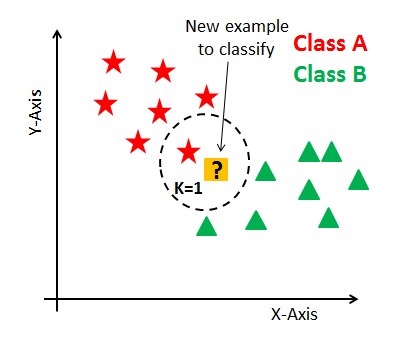


In [71]:
knn = KNeighborsClassifier(n_neighbors = 11, metric = 'minkowski', p = 2)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=11, p=2,
                     weights='uniform')

In [72]:
knn_score = round(knn.score(X_train, y_train) *100, 2)
print(knn_score)

84.18


In [73]:
y_pred = knn.predict(X_val)

In [74]:
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_val.reshape(len(y_val),1)),1))

[[0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [1 0]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]

In [75]:
# Making the Confusion Matrix
knn_cm = confusion_matrix(y_val, y_pred)
print(knn_cm)
val_knn_acc_score = round(accuracy_score(y_val, y_pred, normalize=True) * 100, 2)
val_knn_acc_score

[[159  27]
 [ 30  81]]


80.81

In [76]:
# Applying k-Fold Cross Validation
knn_accuracies = cross_val_score(estimator = knn, X = X_train, y = y_train, cv = 10)
cv_knn_acc_score = round(knn_accuracies.mean()*100, 2)
cv_knn_std  = round(knn_accuracies.std()*100, 2)
print("Accuracy: {:.2f} %".format(cv_knn_acc_score))
print("Standard Deviation: {:.2f} %".format(cv_knn_std))

Accuracy: 82.16 %
Standard Deviation: 4.13 %


In [77]:
# # Applying GridSearchCV
# parameters = {'n_neighbors': [3, 5, 11, 19], 
#     'weights': ['uniform', 'distance'],
#     'metric': ['euclidean', 'manhattan', 'minkowski']}

# grid_search = GridSearchCV(estimator = knn,
#                            param_grid = parameters,
#                            scoring = 'accuracy',
#                            cv = 10,
#                            n_jobs = -1)
# grid_search.fit(X_train, y_train)
# best_accuracy = grid_search.best_score_
# best_parameters = grid_search.best_params_
# print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
# print("Best Parameters:", best_parameters)

## Support Vector Machine Linear

[SVM](https://www.datacamp.com/community/tutorials/svm-classification-scikit-learn-python) offers very high accuracy compared to other classifiers such as logistic regression, and decision trees. It is known for its kernel trick to handle nonlinear input spaces. It is used in a variety of applications such as face detection, intrusion detection, classification of emails, news articles and web pages, classification of genes, and handwriting recognition.    

How does SVM work?    
The main objective is to segregate the given dataset in the best possible way. The distance between the either nearest points is known as the margin. The objective is to select a hyperplane with the maximum possible margin between support vectors in the given dataset. SVM searches for the maximum marginal hyperplane in the following steps:

- Generate hyperplanes which segregates the classes in the best way. Left-hand side figure showing three hyperplanes black, blue and orange. Here, the blue and orange have higher classification error, but the black is separating the two classes correctly.

- Select the right hyperplane with the maximum segregation from the either nearest data points as shown in the right-hand side figure.

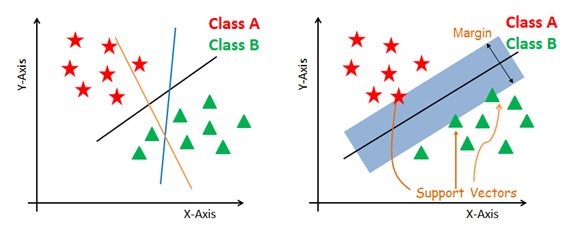



In [78]:
from sklearn.svm import SVC
svc_lin = SVC(C = 1, gamma = 0.001, kernel = 'linear')
svc_lin.fit(X_train, y_train)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [79]:
svc_lin_score = round(svc_lin.score(X_train, y_train) * 100, 2)
print(svc_lin_score)

83.5


In [80]:
y_pred = svc_lin.predict(X_val)

In [81]:
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_val.reshape(len(y_val),1)),1))

[[0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [1 0]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]

In [82]:
# Making the Confusion Matrix
svc_lin_cm = confusion_matrix(y_val, y_pred)
print(svc_lin_cm)
val_svc_lin_acc_score = round(accuracy_score(y_val, y_pred, normalize=True) *100, 2)
val_svc_lin_acc_score

[[160  26]
 [ 31  80]]


80.81

In [83]:
# Applying k-Fold Cross Validation
svc_lin_accuracies = cross_val_score(estimator = svc_lin, X = X_train, y = y_train, cv = 10)
cv_svc_lin_acc_score = round(svc_lin_accuracies.mean()*100, 2)
cv_svc_lin_std  = round(svc_lin_accuracies.std()*100, 2)
print("Accuracy: {:.2f} %".format(cv_svc_lin_acc_score))
print("Standard Deviation: {:.2f} %".format(cv_svc_lin_std))

Accuracy: 83.35 %
Standard Deviation: 4.55 %


In [84]:
# # Applying GridSearchCV
# parameters = {'kernel' : ['linear'],
#               'C': [0.001, 0.01, 0.1, 1, 10], 
#               'gamma' : [0.001, 0.01, 0.1, 1]}
# grid_search = GridSearchCV(estimator = svc_lin,
#                            param_grid = parameters,
#                            scoring = 'accuracy',
#                            cv = 10,
#                            n_jobs = -1)
# grid_search.fit(X_train, y_train)
# best_accuracy = grid_search.best_score_
# best_parameters = grid_search.best_params_
# print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
# print("Best Parameters:", best_parameters)

## SVC - Kernel SVM Algorithm RBF

In [85]:
svc_rbf = SVC(kernel = 'rbf', random_state = 0, gamma= 0.1, C = 0.5)
svc_rbf.fit(X_train, y_train)

SVC(C=0.5, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [86]:
svc_rbf_score = round(svc_rbf.score(X_train, y_train) * 100, 2)
print(svc_rbf_score)

84.34


In [87]:
y_pred = svc_rbf.predict(X_val)
print(y_pred)

[0 0 0 1 1 0 1 1 0 1 0 1 0 1 1 1 0 0 0 1 0 1 0 0 1 1 0 1 1 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 1 0 0 0
 0 0 1 0 0 0 0 1 1 0 0 1 1 1 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 1 0
 1 0 1 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 1 1 1 0 1
 1 0 0 1 1 0 1 0 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0
 0 1 0 0 1 1 0 1 1 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1
 1 0 0 0 0 1 0 0 0 1 1 1 0 0 1 1 1 0 0 1 0 0 1 1 1 0 0 1 0 0 0 0 0 1 1 0 0
 0 0 0 0 0 0 0 1 0 0 1 0 0 1 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 1 1 1 0
 0]


In [88]:
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_val.reshape(len(y_val),1)),1))

[[0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [1 0]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]

In [89]:
# Making the Confusion Matrix
svc_rbf_cm = confusion_matrix(y_val, y_pred)
print(svc_rbf_cm)
val_svc_rbf_acc_score = round(accuracy_score(y_val, y_pred, normalize=True) *100, 2)
val_svc_rbf_acc_score

[[162  24]
 [ 30  81]]


81.82

In [90]:
# Applying k-Fold Cross Validation
svc_rbf_accuracies = cross_val_score(estimator = svc_rbf, X = X_train, y = y_train, cv = 10)
cv_svc_rbf_acc_score = round(svc_rbf_accuracies.mean()*100, 2)
cv_svc_rbf_std  = round(svc_rbf_accuracies.std()*100, 2)
print("Accuracy: {:.2f} %".format(cv_svc_rbf_acc_score))
print("Standard Deviation: {:.2f} %".format(cv_svc_rbf_std))

Accuracy: 83.34 %
Standard Deviation: 4.24 %


In [91]:
# # Applying Grid Search to find the best model and the best parameters
# parameters = [{'C': [0.25, 0.5, 0.75, 1], 'kernel': ['linear']},
#               {'C': [0.25, 0.5, 0.75, 1], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}]
# grid_search = GridSearchCV(estimator = svc_rbf,
#                            param_grid = parameters,
#                            scoring = 'accuracy',
#                            cv = 10,
#                            n_jobs = -1)
# grid_search.fit(X_train, y_train)
# best_accuracy = grid_search.best_score_
# best_parameters = grid_search.best_params_
# print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
# print("Best Parameters:", best_parameters)

## GaussianNB

Suppose you are a product manager, you want to classify customer reviews in positive and negative classes. Or As a loan manager, you want to identify which loan applicants are safe or risky? As a healthcare analyst, you want to predict which patients can suffer from diabetes disease. All the examples have the same kind of problem to classify reviews, loan applicants, and patients.

[Naive Bayes](https://www.datacamp.com/community/tutorials/naive-bayes-scikit-learn) is the most straightforward and fast classification algorithm, which is suitable for a large chunk of data. Naive Bayes classifier is successfully used in various applications such as spam filtering, text classification, sentiment analysis, and recommender systems. It uses Bayes theorem of probability for prediction of unknown class.

How Naive Bayes classifier works?
Let’s understand the working of Naive Bayes through an example. Given an example of weather conditions and playing sports. You need to calculate the probability of playing sports. Now, you need to classify whether players will play or not, based on the weather condition.

First Approach (In case of a single feature)
Naive Bayes classifier calculates the probability of an event in the following steps:

- Step 1: Calculate the prior probability for given class labels
- Step 2: Find Likelihood probability with each attribute for each class
- Step 3: Put these value in Bayes Formula and calculate posterior probability.
- Step 4: See which class has a higher probability, given the input belongs to the higher probability class.    

For simplifying prior and posterior probability calculation you can use the two tables frequency and likelihood tables. Both of these tables will help you to calculate the prior and posterior probability. The Frequency table contains the occurrence of labels for all features. There are two likelihood tables. Likelihood Table 1 is showing prior probabilities of labels and Likelihood Table 2 is showing the posterior probability.    
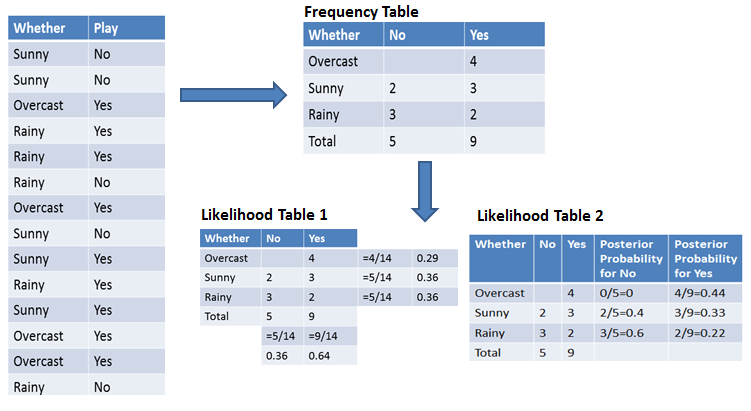

In [92]:
gauss = GaussianNB(var_smoothing = 0.01519911082952933)
gauss.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=0.01519911082952933)

In [93]:
gauss_score = round(gauss.score(X_train, y_train) * 100, 2)
print(gauss_score)

81.14


In [94]:
y_pred = gauss.predict(X_val)
print(y_pred)

[0 0 0 1 1 0 1 1 0 1 0 1 0 1 1 1 0 0 0 1 0 1 0 0 1 1 0 1 1 0 0 1 0 0 0 1 0
 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 1 0 1 0 1 1 1 0 0 0
 0 1 1 1 0 0 0 0 1 0 0 1 1 1 1 1 0 0 1 1 0 0 1 0 0 0 0 0 0 0 1 1 1 1 0 1 0
 1 0 1 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 1 1 1 0 1
 1 0 0 1 1 0 1 0 1 0 1 1 0 0 1 1 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0
 0 1 0 0 1 1 0 1 1 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 1 0 1 0 0 0 0 1 1 0 1
 1 0 0 0 0 1 0 0 0 1 1 1 0 0 1 1 1 0 0 1 0 0 1 1 1 0 0 1 0 0 1 0 0 1 1 0 0
 0 0 0 0 0 0 0 1 0 0 1 0 0 1 1 1 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 1 1 1 0
 0]


In [95]:
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_val.reshape(len(y_val),1)),1))

[[0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 0]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [1 0]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]

In [96]:
# Making the Confusion Matrix
gauss_cm = confusion_matrix(y_val, y_pred)
print(gauss_cm)
val_gauss_acc_score = round(accuracy_score(y_val, y_pred, normalize=True) *100, 2)
val_gauss_acc_score

[[154  32]
 [ 28  83]]


79.8

In [97]:
# Applying k-Fold Cross Validation
gauss_accuracies = cross_val_score(estimator = gauss, X = X_train, y = y_train, cv = 10)
cv_gauss_acc_score = round(gauss_accuracies.mean()*100, 2)
cv_gauss_std  = round(gauss_accuracies.std()*100, 2)
print("Accuracy: {} %".format(cv_gauss_acc_score))
print("Standard Deviation: {} %".format(cv_gauss_std))

Accuracy: 81.16 %
Standard Deviation: 5.35 %


In [98]:
# # Applying Grid Search to find the best model and the best parameters
# parameters = [{'var_smoothing': np.logspace(0,-9, num=100)}]
# grid_search = GridSearchCV(estimator = gauss,
#                            param_grid = parameters,
#                            scoring = 'accuracy',
#                            cv = 10,
#                            n_jobs = -1)
# grid_search.fit(X_train, y_train)
# best_accuracy = grid_search.best_score_
# best_parameters = grid_search.best_params_
# print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
# print("Best Parameters:", best_parameters)

## XGBOOST

[Boosting](https://www.datacamp.com/community/tutorials/xgboost-in-python) is a sequential technique which works on the principle of an ensemble. It combines a set of weak learners and delivers improved prediction accuracy. At any instant t, the model outcomes are weighed based on the outcomes of previous instant t-1. The outcomes predicted correctly are given a lower weight and the ones miss-classified are weighted higher. Note that a weak learner is one which is slightly better than random guessing. For example, a decision tree whose predictions are slightly better than 50%. Let's understand boosting in general with a simple illustration.

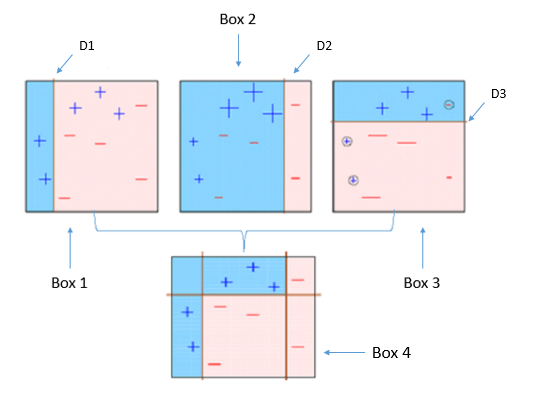


Four classifiers (in 4 boxes), shown above, are trying to classify + and - classes as homogeneously as possible.

1. Box 1: The first classifier (usually a decision stump) creates a vertical line (split) at D1. It says anything to the left of D1 is + and anything to the right of D1 is -. However, this classifier misclassifies three + points.

Note a Decision Stump is a Decision Tree model that only splits off at one level, therefore the final prediction is based on only one feature.

2. Box 2: The second classifier gives more weight to the three + misclassified points (see the bigger size of +) and creates a vertical line at D2. Again it says, anything to the right of D2 is - and left is +. Still, it makes mistakes by incorrectly classifying three - points.

3. Box 3: Again, the third classifier gives more weight to the three - misclassified points and creates a horizontal line at D3. Still, this classifier fails to classify the points (in the circles) correctly.

4. Box 4: This is a weighted combination of the weak classifiers (Box 1,2 and 3). As you can see, it does a good job at classifying all the points correctly.

Speed and performance : Originally written in C++, it is comparatively faster than other ensemble classifiers.

Core algorithm is parallelizable : Because the core XGBoost algorithm is parallelizable it can harness the power of multi-core computers. It is also parallelizable onto GPU’s and across networks of computers making it feasible to train on very large datasets as well.

Consistently outperforms other algorithm methods : It has shown better performance on a variety of machine learning benchmark datasets.

Wide variety of tuning parameters : XGBoost internally has parameters for cross-validation, regularization, user-defined objective functions, missing values, tree parameters, scikit-learn compatible API etc.

XGBoost (Extreme Gradient Boosting) belongs to a family of boosting algorithms and uses the gradient boosting (GBM) framework at its core. It is an optimized distributed gradient boosting library. But wait, what is boosting? Well, keep on reading.

In [99]:
xgboost = XGBClassifier(colsample_bytree = 0.8, gamma = 2, max_depth = 4, min_child_weight = 1, subsample = 0.6)
xgboost.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=2,
              learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.6, verbosity=1)

In [100]:
xgboost_score = round(xgboost.score(X_train, y_train) *100, 2)
print(xgboost_score)

88.89


In [101]:
y_pred = xgboost.predict(X_val)
print(y_pred)

[0 0 0 1 1 0 1 1 0 1 0 1 0 1 1 1 0 0 0 1 0 1 0 0 0 1 0 0 1 0 0 1 0 0 0 1 0
 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 1 1 1 0 0 0
 0 1 0 1 0 0 0 1 1 0 0 1 1 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0
 1 1 1 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1
 1 0 0 0 0 0 1 0 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0
 0 1 0 0 1 0 0 1 1 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1
 1 0 0 0 0 1 0 0 0 1 1 0 0 0 1 1 1 0 0 1 0 0 1 1 1 0 0 0 0 0 0 0 0 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 1 1 1 0
 0]


In [102]:
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_val.reshape(len(y_val),1)),1))

[[0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]

In [103]:
# Making the Confusion Matrix
xgboost_cm = confusion_matrix(y_val, y_pred)
print(xgboost_cm)
val_xgboos_acc_score = round(accuracy_score(y_val, y_pred, normalize=True) *100, 2)
val_xgboos_acc_score

[[169  17]
 [ 33  78]]


83.16

In [104]:
# Applying k-Fold Cross Validation
xgboost_accuracies = cross_val_score(estimator = xgboost, X = X_train, y = y_train, cv = 10)
cv_xgboost_acc_score = round(xgboost_accuracies.mean() * 100, 2)
cv_xgboost_std  = round(xgboost_accuracies.std() * 100, 2)
print("Accuracy: {} %".format(cv_xgboost_acc_score))
print("Standard Deviation: {} %".format(cv_xgboost_std))

Accuracy: 82.83 %
Standard Deviation: 4.89 %


In [105]:
# parameters = [{
#         'min_child_weight': [1, 5, 10],
#         'gamma': [0.5, 1, 1.5, 2, 5],
#         'subsample': [0.6, 0.8, 1.0],
#         'colsample_bytree': [0.6, 0.8, 1.0],
#         'max_depth': [3, 4, 5]
#         }]
# grid_search = GridSearchCV(estimator = xgboost,
#                            param_grid = parameters,
#                            scoring = 'accuracy',
#                            cv = 10,
#                            n_jobs = -1)
# grid_search.fit(X_train, y_train)
# best_accuracy = grid_search.best_score_
# best_parameters = grid_search.best_params_
# print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
# print("Best Parameters:", best_parameters)

# Models Score(Data Frame)

In [106]:
models = pd.DataFrame({
    'Model': ['LogisticRegression', 'DecisionTreeClassifier', 'RandomForestClassifier', 'KNeighborsClassifier', 'SVMLinear', 'SVM_RBF', 'GaussianNB', 'XGBoost'],
    'Score': [log_reg_score, decision_tree_score, forest_score, knn_score, svc_lin_score, svc_rbf_score, gauss_score, xgboost_score],
    'Accuracy_Score': [val_log_reg_acc_score, val_decision_tree_acc_score, val_forest_acc_score, val_knn_acc_score, val_svc_lin_acc_score, val_svc_rbf_acc_score, val_gauss_acc_score, val_xgboos_acc_score],
    'Cross_Validation_Score': [cv_log_reg_acc_score, cv_decision_tree_acc_score, cv_forest_acc_score, cv_knn_acc_score, cv_svc_lin_acc_score, cv_svc_rbf_acc_score, cv_gauss_acc_score, cv_xgboost_acc_score],
    'Cross_Validation_Std': [cv_log_reg_std, cv_decision_tree_std, cv_forest_std, cv_knn_std, cv_svc_lin_std, cv_svc_rbf_std, cv_gauss_std, cv_xgboost_std]})
models.sort_values(by='Accuracy_Score', ascending=False)

,Model,Score,Accuracy_Score,Cross_Validation_Score,Cross_Validation_Std
2,RandomForestClassifier,87.37,83.16,83.18,6.14
7,XGBoost,88.89,83.16,82.83,4.89
0,LogisticRegression,83.33,82.15,82.84,3.83
5,SVM_RBF,84.34,81.82,83.34,4.24
1,DecisionTreeClassifier,88.05,80.81,81.65,6.23
3,KNeighborsClassifier,84.18,80.81,82.16,4.13
4,SVMLinear,83.50,80.81,83.35,4.55
6,GaussianNB,81.14,79.80,81.16,5.35


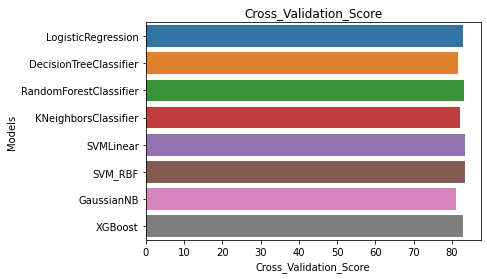

In [108]:
sns.barplot(x='Cross_Validation_Score', y='Model', orient = "h", data=models, )
plt.ylabel("Models")
plt.title("Cross_Validation_Score")
plt.show()

# Feature Importances

In [109]:
print(forest.feature_importances_)

[0.10988432 0.11998708 0.01804972 0.01008388 0.01705377 0.01408194
 0.03170878 0.12880936 0.03420748 0.00432862 0.10488973 0.14301828
 0.05738407 0.03146383 0.17504916]


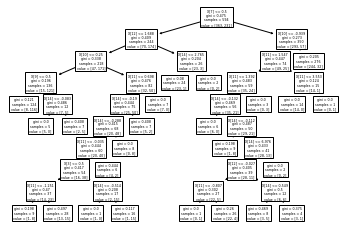

In [110]:
from sklearn import tree
tree.plot_tree(decision_tree);

In [120]:
tree.export_graphviz(decision_tree, out_file="/content/drive/MyDrive/Colab Notebooks/decision_tree_two.dot")

In [125]:
import pydot
(graph,) = pydot.graph_from_dot_file('/content/drive/MyDrive/Colab Notebooks/decision_tree_two.dot')
graph.write_png('/content/drive/MyDrive/Colab Notebooks/decision_tree_two.png')

# Prediction

In [111]:
predictions = forest.predict(X_test)
print(predictions)

[0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 0 1 0 1 1 0 1 0 1 0 0 0 0 0 1 0 0 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 0 0
 1 0 0 1 0 1 1 0 0 0 0 0 1 1 1 1 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0
 0 0 1 0 0 1 0 0 1 1 1 1 1 1 1 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 1 0 1 0 1 1 0 1 1 1 1 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 1 0 0 0 1 1 1 0 1 0 1 1 0 0 0 0 0 1 0 0 1 0 1 1 0 1 0 0 1 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 1 1 0 0 1 0 0 1]


In [112]:
result = pd.DataFrame({'PassengerId': PassengerId_test_dt, 'Survived': predictions})
result.to_csv('random_forest_my_result.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


# Model

In [ ]:
def modelsClassifier(X_train,y_train):
  
 #Using Logistic Regression Algorithm to the Training Set
  from sklearn.linear_model import LogisticRegression
  log = LogisticRegression(random_state = 0)
  log.fit(X_train, y_train)
  
  #Using KNeighborsClassifier Method of neighbors class to use Nearest Neighbor algorithm
  from sklearn.neighbors import KNeighborsClassifier
  knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
  knn.fit(X_train, y_train)

  #Using SVC method of svm class to use Support Vector Machine Algorithm
  from sklearn.svm import SVC
  svc_lin = SVC(kernel = 'linear', random_state = 0)
  svc_lin.fit(X_train, y_train)

  #Using SVC method of svm class to use Kernel SVM Algorithm
  from sklearn.svm import SVC
  svc_rbf = SVC(kernel = 'rbf', random_state = 0)
  svc_rbf.fit(X_train, y_train)

  #Using GaussianNB method of naïve_bayes class to use Naïve Bayes Algorithm
  from sklearn.naive_bayes import GaussianNB
  gauss = GaussianNB()
  gauss.fit(X_train, y_train)

  #Using DecisionTreeClassifier of tree class to use Decision Tree Algorithm
  from sklearn.tree import DecisionTreeClassifier
  tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
  tree.fit(X_train, y_train)

  #Using RandomForestClassifier method of ensemble class to use Random Forest Classification algorithm
  from sklearn.ensemble import RandomForestClassifier
  forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
  forest.fit(X_train, y_train)
  
  #Using XGBOOST
  from xgboost import XGBClassifier
  XGBClassifier = XGBClassifier(colsample_bytree = 0.8, gamma = 2, max_depth = 4, min_child_weight = 1, subsample = 0.6)
  XGBClassifier.fit(X_train, y_train)
  
  #print model accuracy on the training data.
  print('[0]Logistic Regression Training Accuracy:', log.score(X_train, y_train))
  print('[1]K Nearest Neighbor Training Accuracy:', knn.score(X_train, y_train))
  print('[2]Support Vector Machine (Linear Classifier) Training Accuracy:', svc_lin.score(X_train, y_train))
  print('[3]Support Vector Machine (RBF Classifier) Training Accuracy:', svc_rbf.score(X_train, y_train))
  print('[4]Gaussian Naive Bayes Training Accuracy:', gauss.score(X_train, y_train))
  print('[5]Decision Tree Classifier Training Accuracy:', tree.score(X_train, y_train))
  print('[6]Random Forest Classifier Training Accuracy:', forest.score(X_train, y_train))
  print('[7]XGBoost Classifier Training Accuracy:', XGBClassifier.score(X_train, y_train))
  
  return log, knn, svc_lin, svc_rbf, gauss, tree, forest, XGBClassifier


In [ ]:
model = modelsClassifier(X_train,y_train)

[0]Logistic Regression Training Accuracy: 0.8289637952559301
[1]K Nearest Neighbor Training Accuracy: 0.8689138576779026
[2]Support Vector Machine (Linear Classifier) Training Accuracy: 0.8277153558052435
[3]Support Vector Machine (RBF Classifier) Training Accuracy: 0.8439450686641697
[4]Gaussian Naive Bayes Training Accuracy: 0.8039950062421972
[5]Decision Tree Classifier Training Accuracy: 0.9800249687890137
[6]Random Forest Classifier Training Accuracy: 0.9600499375780275
[7]XGBoost Classifier Training Accuracy: 0.8838951310861424


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

classifier = ["Logistic Regression", "K Nearest Neighbor", "Support Vector Machine Linear", "Support Vector Machine RBF", "Gaussian Naive Bayes", "Decision Tree", "Random Forest", "XGBoost" ]

for i in range(len(model)):
  clfType = classifier[i]
  print(clfType)
  y_pred = model[i].predict(X_val)
  cm = confusion_matrix(y_val, y_pred) 
  print(cm, '\n', 'Model[{}] Testing Accuracy = "{} !"'.format(i, accuracy_score(y_val, y_pred, normalize=True)), '\n')

Logistic Regression
[[46  5]
 [10 29]] 
 Model[0] Testing Accuracy = "0.8333333333333334 !" 

K Nearest Neighbor
[[46  5]
 [11 28]] 
 Model[1] Testing Accuracy = "0.8222222222222222 !" 

Support Vector Machine Linear
[[47  4]
 [11 28]] 
 Model[2] Testing Accuracy = "0.8333333333333334 !" 

Support Vector Machine RBF
[[47  4]
 [11 28]] 
 Model[3] Testing Accuracy = "0.8333333333333334 !" 

Gaussian Naive Bayes
[[45  6]
 [10 29]] 
 Model[4] Testing Accuracy = "0.8222222222222222 !" 

Decision Tree
[[36 15]
 [16 23]] 
 Model[5] Testing Accuracy = "0.6555555555555556 !" 

Random Forest
[[43  8]
 [13 26]] 
 Model[6] Testing Accuracy = "0.7666666666666667 !" 

XGBoost
[[46  5]
 [12 27]] 
 Model[7] Testing Accuracy = "0.8111111111111111 !" 



# Conclusion 

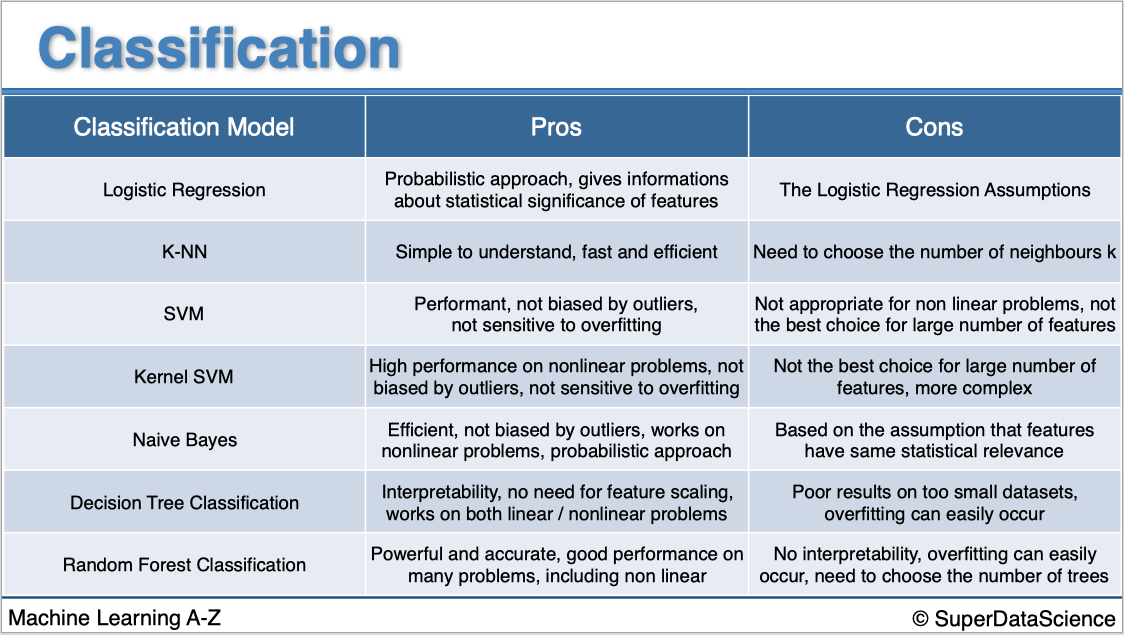

My [Kaggle](https://www.kaggle.com/danielsafiski/titanicml) competition notebook. Ranking (Top 60%). Score of my prediction: 0.77272.     

What can we do to have better prediction.
- [Outlier detection](https://towardsdatascience.com/a-brief-overview-of-outlier-detection-techniques-1e0b2c19e561)

“Observation which deviates so much from other observations as to arouse suspicion it was generated by a different mechanism” — Hawkins(1980)

Outliers are extreme values that deviate from other observations on data , they may indicate a variability in a measurement, experimental errors or a novelty. In other words, an outlier is an observation that diverges from an overall pattern on a sample.

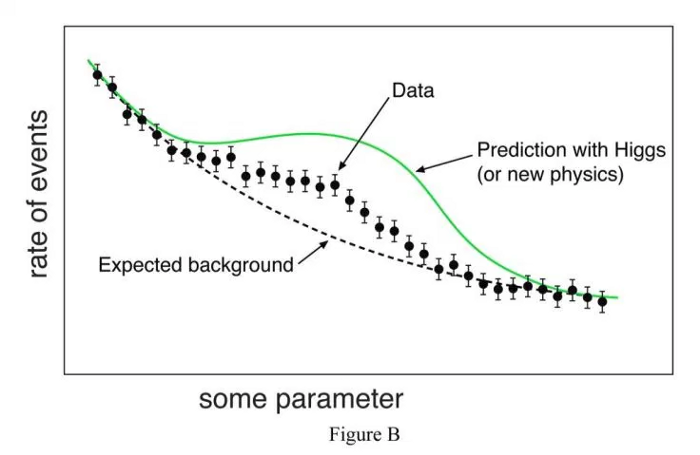


- [Overfitting](https://elitedatascience.com/overfitting-in-machine-learning#overfitting-vs-underfitting)

[Machine Learning Fundamentals: Bias and Variance](https://www.youtube.com/watch?v=EuBBz3bI-aA) - youtube video

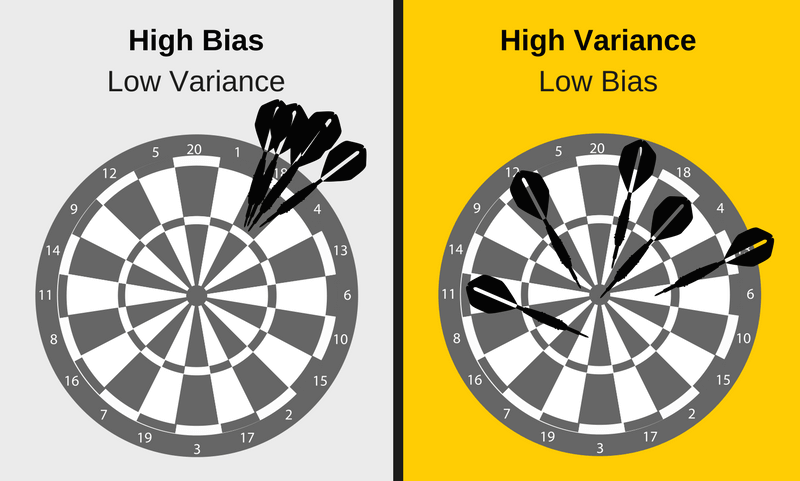

- Need of better understanding the colleration between columns Parch and Sibilings.